<a href="https://colab.research.google.com/github/khushboonfsu/khushi/blob/main/google_search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytrends

In [2]:
pip install requests

In [3]:
pip install lxml

In [4]:
pip install pandas

In [13]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

all_keywords = ['Machine Learning', 'Data Analyst', 'Python', 'Cloud Computing','Education']
keywords = []

timeframes = ['today 5-y', 'today 12-m',
              'today 3-m', 'today 1-m']
cat = '0'
geo = ''
gprop = ''

countries = ['india', 'united_states', 'united_kingdom',
             'netherlands', 'brazil']

#Part 1 - Google trends analysis

def check_trends():
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = round(data.mean(),2)
    avg = round(data[kw][-52:].mean(),2) #Last year average
    avg2 = round(data[kw][:52].mean(),2) #Yearly average of 5 years ago.
    trend = round(((avg/mean[kw])-1)*100,2)
    trend2 = round(((avg/avg2)-1)*100,2)
    print('The average 5 years interest of ' + kw + ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + ' compared to the last 5 years'
          + ' has changed by ' + str(trend)+ '%.')
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')

    #Comparison last year vs. 5 years ago
    if avg2 == 0:
        print('This didn\'t exist 5 years ago.')
    elif trend2 > 15:
        print('The last year interest is quite higher compared to 5 years ago.'
              + ' It has increased by ' + str(trend2)+'%.')
    elif trend2 < -15:
        print('The last year interest is quite lower compared to 5 years ago.'
              + ' It has decreased by ' + str(trend2)+'%.')
    else:
        print('The last year interest is comparable to 5 years ago. '
              + ' It has changed by ' + str(trend2)+'%.')

    print('')

for kw in all_keywords:
    keywords.append(kw)
    check_trends()
    keywords.pop()

#Part 2 - Relative keyword comparison

def relative_comparison():
    plt.figure(figsize = (10,8))
    x_pos = np.arange(len(all_keywords))

    #Last 5-years
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax1 = plt.subplot2grid((3,2), (0,0), rowspan = 1, colspan = 1)
    ax2 = plt.subplot2grid((3,2), (0,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax1.plot(data[kw], label = kw)
    ax2.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 12-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax3 = plt.subplot2grid((3,2), (1,0), rowspan = 1, colspan = 1)
    ax4 = plt.subplot2grid((3,2), (1,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax3.plot(data[kw], label = kw)
    ax4.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 3-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[2],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax5 = plt.subplot2grid((3,2), (2,0), rowspan = 1, colspan = 1)
    ax6 = plt.subplot2grid((3,2), (2,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax5.plot(data[kw], label = kw)
    print(mean)
    ax6.bar(x_pos, mean[0:len(all_keywords)], align = 'center')
    plt.xticks(x_pos, all_keywords)

    ax1.set_ylabel('Last 5 years')
    ax3.set_ylabel('Last year')
    ax5.set_ylabel('Last 3 months')
    ax1.set_title('Relative interest over time', fontsize = 14)
    ax2.set_title('Relative interest for the period', fontsize = 14)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
    ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    ax1.legend()
    ax3.legend()
    ax5.legend()
    plt.show()

for kw in all_keywords:
    keywords.append(kw)
    check_trends()
    keywords.pop()


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


The average 5 years interest of Machine Learning was 3.42.
The last year interest of Machine Learning compared to the last 5 years has changed by 18.13%.
The interest for Machine Learning is new and trending.
The last year interest is quite higher compared to 5 years ago. It has increased by 40.77%.

The average 5 years interest of Data Analyst was 1.56.
The last year interest of Data Analyst compared to the last 5 years has changed by 28.21%.
The interest for Data Analyst is new and trending.
The last year interest is quite higher compared to 5 years ago. It has increased by 100.0%.



/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


The average 5 years interest of Python was 51.4.
The last year interest of Python compared to the last 5 years has changed by 4.09%.
The interest for Python is seasonal.
The last year interest is quite higher compared to 5 years ago. It has increased by 15.98%.

The average 5 years interest of Cloud Computing was 1.06.
The last year interest of Cloud Computing compared to the last 5 years has changed by -3.77%.
This is something to be checked.
The last year interest is comparable to 5 years ago.  It has changed by 2.0%.



/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


The average 5 years interest of Education was 51.49.
The last year interest of Education compared to the last 5 years has changed by -0.47%.
The interest for Education is seasonal.
The last year interest is comparable to 5 years ago.  It has changed by -1.29%.

The average 5 years interest of Machine Learning was 3.42.
The last year interest of Machine Learning compared to the last 5 years has changed by 18.13%.
The interest for Machine Learning is new and trending.
The last year interest is quite higher compared to 5 years ago. It has increased by 40.77%.



/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


The average 5 years interest of Data Analyst was 1.56.
The last year interest of Data Analyst compared to the last 5 years has changed by 28.21%.
The interest for Data Analyst is new and trending.
The last year interest is quite higher compared to 5 years ago. It has increased by 100.0%.

The average 5 years interest of Python was 51.4.
The last year interest of Python compared to the last 5 years has changed by 4.09%.
The interest for Python is seasonal.
The last year interest is quite higher compared to 5 years ago. It has increased by 15.98%.

The average 5 years interest of Cloud Computing was 1.06.
The last year interest of Cloud Computing compared to the last 5 years has changed by -3.77%.
This is something to be checked.
The last year interest is comparable to 5 years ago.  It has changed by 2.0%.

The average 5 years interest of Education was 51.49.
The last year interest of Education compared to the last 5 years has changed by -0.47%.
The interest for Education is seasonal.
Th

/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [17]:
pip install matplotlib

In [18]:
pip install numpy

In [19]:
pip install matplotlib dates

  Preparing metadata (setup.py) ... done
  Created wheel for dates: filename=dates-0.0.1-py3-none-any.whl size=6335 sha256=b0931a6e0e9778078dc714bbdef2c836f2ed04a013ace7b828d543b73c3aff10
  Stored in directory: /root/.cache/pip/wheels/84/18/62/3dce5c5c879586dbf7e24b892173d8c17defaa769606786208
Successfully built dates


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fut

Machine Learning      7.27
Data Analyst          4.00
Python               97.45
Cloud Computing       2.12
Education           100.00
isPartial             0.02
dtype: float64


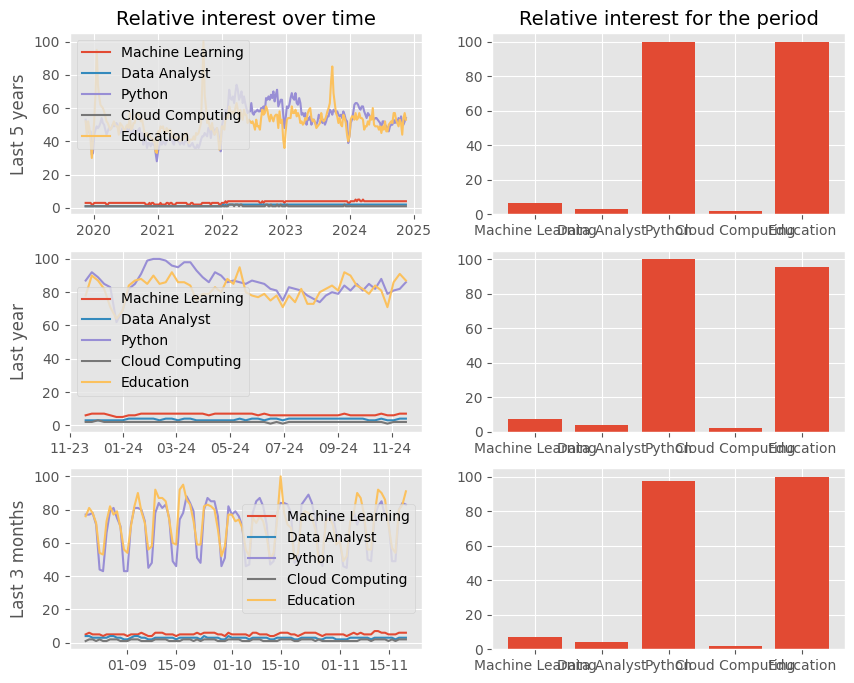

In [32]:
from pytrends.request import TrendReq
from pytrends.exceptions import TooManyRequestsError
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import time

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

all_keywords = ['Machine Learning', 'Data Analyst', 'Python', 'Cloud Computing','Education']
keywords = []

timeframes = ['today 5-y', 'today 12-m',
              'today 3-m', 'today 1-m']
cat = '0'
geo = ''
gprop = ''

countries = ['india', 'united_states', 'united_kingdom',
             'netherlands', 'brazil']

#Part 1 - Google trends analysis

def check_trends():
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = round(data.mean(),2)
    avg = round(data[kw][-52:].mean(),2) #Last year average
    avg2 = round(data[kw][:52].mean(),2) #Yearly average of 5 years ago.
    trend = round(((avg/mean[kw])-1)*100,2)
    trend2 = round(((avg/avg2)-1)*100,2)
    print('The average 5 years interest of ' + kw + ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + ' compared to the last 5 years'
          + ' has changed by ' + str(trend)+ '%.')
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')

    #Comparison last year vs. 5 years ago
    if avg2 == 0:
        print('This didn\'t exist 5 years ago.')
    elif trend2 > 15:
        print('The last year interest is quite higher compared to 5 years ago.'
              + ' It has increased by ' + str(trend2)+'%.')
    elif trend2 < -15:
        print('The last year interest is quite lower compared to 5 years ago.'
              + ' It has decreased by ' + str(trend2)+'%.')
    else:
        print('The last year interest is comparable to 5 years ago. '
              + ' It has changed by ' + str(trend2)+'%.')

    print('')

    time.sleep(120)

##for kw in all_keywords:
##    keywords.append(kw)
##    check_trends()
##    keywords.pop()

#Part 2 - Relative keyword comparison

def relative_comparison():
    plt.figure(figsize = (10,8))
    x_pos = np.arange(len(all_keywords))

    #Last 5-years
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax1 = plt.subplot2grid((3,2), (0,0), rowspan = 1, colspan = 1)
    ax2 = plt.subplot2grid((3,2), (0,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax1.plot(data[kw], label = kw)
    ax2.bar(x_pos, mean[all_keywords], align = 'center')
    plt.xticks(x_pos, all_keywords)

    time.sleep(120)

    #Last 12-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax3 = plt.subplot2grid((3,2), (1,0), rowspan = 1, colspan = 1)
    ax4 = plt.subplot2grid((3,2), (1,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax3.plot(data[kw], label = kw)
    ax4.bar(x_pos, mean[all_keywords], align = 'center')
    plt.xticks(x_pos, all_keywords)

    time.sleep(120)

    #Last 3-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[2],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax5 = plt.subplot2grid((3,2), (2,0), rowspan = 1, colspan = 1)
    ax6 = plt.subplot2grid((3,2), (2,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax5.plot(data[kw], label = kw)
    print(mean)
    ax6.bar(x_pos, mean[0:len(all_keywords)], align = 'center')
    plt.xticks(x_pos, all_keywords)

    ax1.set_ylabel('Last 5 years')
    ax3.set_ylabel('Last year')
    ax5.set_ylabel('Last 3 months')
    ax1.set_title('Relative interest over time', fontsize = 14)
    ax2.set_title('Relative interest for the period', fontsize = 14)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
    ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    ax1.legend()
    ax3.legend()
    ax5.legend()
    plt.show()


relative_comparison()

In [43]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

all_keywords = ['Machine Learning', 'Data Analyst', 'Python', 'Cloud Computing','Education']
keywords = []

timeframes = ['today 5-y', 'today 12-m',
              'today 3-m', 'today 1-m']
cat = '0'
geo = ''
gprop = ''

countries = ['india', 'united_states', 'united_kingdom',
             'netherlands', 'brazil']

#Part 1 - Google trends analysis

def check_trends():
    pytrends.build_payload(keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = round(data.mean(),2)
    avg = round(data[kw][-52:].mean(),2) #Last year average
    avg2 = round(data[kw][:52].mean(),2) #Yearly average of 5 years ago.
    trend = round(((avg/mean[kw])-1)*100,2)
    trend2 = round(((avg/avg2)-1)*100,2)
    print('The average 5 years interest of ' + kw + ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + ' compared to the last 5 years'
          + ' has changed by ' + str(trend)+ '%.')
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')

    #Comparison last year vs. 5 years ago
    if avg2 == 0:
        print('This didn\'t exist 5 years ago.')
    elif trend2 > 15:
        print('The last year interest is quite higher compared to 5 years ago.'
              + ' It has increased by ' + str(trend2)+'%.')
    elif trend2 < -15:
        print('The last year interest is quite lower compared to 5 years ago.'
              + ' It has decreased by ' + str(trend2)+'%.')
    else:
        print('The last year interest is comparable to 5 years ago. '
              + ' It has changed by ' + str(trend2)+'%.')

    print('')

##for kw in all_keywords:
##    keywords.append(kw)
##    check_trends()
##    keywords.pop()

#Part 2 - Relative keyword comparison

def relative_comparison():
    plt.figure(figsize = (10,8))
    x_pos = np.arange(len(all_keywords))

    #Last 5-years
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax1 = plt.subplot2grid((3,2), (0,0), rowspan = 1, colspan = 1)
    ax2 = plt.subplot2grid((3,2), (0,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax1.plot(data[kw], label = kw)
    ax2.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 12-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax3 = plt.subplot2grid((3,2), (1,0), rowspan = 1, colspan = 1)
    ax4 = plt.subplot2grid((3,2), (1,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax3.plot(data[kw], label = kw)
    ax4.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 3-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[2],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax5 = plt.subplot2grid((3,2), (2,0), rowspan = 1, colspan = 1)
    ax6 = plt.subplot2grid((3,2), (2,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax5.plot(data[kw], label = kw)
    print(mean)
    ax6.bar(x_pos, mean[0:len(all_keywords)], align = 'center')
    plt.xticks(x_pos, all_keywords)

    ax1.set_ylabel('Last 5 years')
    ax3.set_ylabel('Last year')
    ax5.set_ylabel('Last 3 months')
    ax1.set_title('Relative interest over time', fontsize = 14)
    ax2.set_title('Relative interest for the period', fontsize = 14)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
    ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    ax1.legend()
    ax3.legend()
    ax5.legend()
    plt.show()


##relative_comparison()
time.sleep(60)
#Part 3 - Interest per region
def int_per_reg():
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_by_region(resolution = 'COUNTRY',
                                inc_low_vol = True,
                                inc_geo_code = True)
    for kw in all_keywords:
        print(kw)
        data = data.sort_values(by = kw, ascending = False)
        print(data.head())
        print('')

int_per_reg()



Machine Learning
             geoCode  Machine Learning  Data Analyst  Python  Cloud Computing  \
geoName                                                                         
Libya             LY                 8             1      45                1   
Peru              PE                 8             0      64                1   
Egypt             EG                 8             2      59                1   
Iraq              IQ                 7             1      46                2   
Saudi Arabia      SA                 7             2      49                1   

              Education  
geoName                  
Libya                45  
Peru                 27  
Egypt                30  
Iraq                 44  
Saudi Arabia         41  

Data Analyst
                         geoCode  Machine Learning  Data Analyst  Python  \
geoName                                                                    
Northern Mariana Islands      MP                 0             6   

In [4]:
pip install pytrends

In [10]:
pip install pytrends

In [18]:
pip install requests

In [19]:
pip install queries

  Preparing metadata (setup.py) ... done
  Created wheel for queries: filename=queries-2.1.1-py3-none-any.whl size=21719 sha256=bfd42ac2d3fd1d43a7dce10e8fec220e9daf0bcab1e4addb98a216dc268f7f54
  Stored in directory: /root/.cache/pip/wheels/5b/e3/0b/17f1aa6e8f1826ed8ade427d09027c9544403bd92fe2db8048
Successfully built queries


In [13]:
from pytrends.request import TrendReq
from pytrends.exceptions import TooManyRequestsError
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import time

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

all_keywords = ['Machine Learning', 'Data Analyst', 'Python', 'Cloud Computing','Education']
keywords = []

timeframes = ['today 5-y', 'today 12-m',
              'today 3-m', 'today 1-m']
cat = '0'
geo = 'US'
gprop = ''

countries = ['india', 'united_states', 'united_kingdom',
             'netherlands', 'brazil']

#Part 1 - Google trends analysis

def check_trends():
    pytrends.build_payload(keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = round(data.mean(),2)
    avg = round(data[kw][-52:].mean(),2) #Last year average
    avg2 = round(data[kw][:52].mean(),2) #Yearly average of 5 years ago.
    trend = round(((avg/mean[kw])-1)*100,2)
    trend2 = round(((avg/avg2)-1)*100,2)
    print('The average 5 years interest of ' + kw + ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + ' compared to the last 5 years'
          + ' has changed by ' + str(trend)+ '%.')
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')

    #Comparison last year vs. 5 years ago
    if avg2 == 0:
        print('This didn\'t exist 5 years ago.')
    elif trend2 > 15:
        print('The last year interest is quite higher compared to 5 years ago.'
              + ' It has increased by ' + str(trend2)+'%.')
    elif trend2 < -15:
        print('The last year interest is quite lower compared to 5 years ago.'
              + ' It has decreased by ' + str(trend2)+'%.')
    else:
        print('The last year interest is comparable to 5 years ago. '
              + ' It has changed by ' + str(trend2)+'%.')

    print('')

##for kw in all_keywords:
##    keywords.append(kw)
##    check_trends()
##    keywords.pop()

#Part 2 - Relative keyword comparison

def relative_comparison():
    plt.figure(figsize = (10,8))
    x_pos = np.arange(len(all_keywords))

    #Last 5-years
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[0],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax1 = plt.subplot2grid((3,2), (0,0), rowspan = 1, colspan = 1)
    ax2 = plt.subplot2grid((3,2), (0,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax1.plot(data[kw], label = kw)
    ax2.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 12-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax3 = plt.subplot2grid((3,2), (1,0), rowspan = 1, colspan = 1)
    ax4 = plt.subplot2grid((3,2), (1,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax3.plot(data[kw], label = kw)
    ax4.bar(x_pos, mean, align = 'center')
    plt.xticks(x_pos, all_keywords)

    #Last 3-months
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[2],
                           geo,
                           gprop)

    data = pytrends.interest_over_time()
    mean = data.mean()
    mean = round(mean / mean.max() * 100,2)
    ax5 = plt.subplot2grid((3,2), (2,0), rowspan = 1, colspan = 1)
    ax6 = plt.subplot2grid((3,2), (2,1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        ax5.plot(data[kw], label = kw)
    print(mean)
    ax6.bar(x_pos, mean[0:len(all_keywords)], align = 'center')
    plt.xticks(x_pos, all_keywords)

    ax1.set_ylabel('Last 5 years')
    ax3.set_ylabel('Last year')
    ax5.set_ylabel('Last 3 months')
    ax1.set_title('Relative interest over time', fontsize = 14)
    ax2.set_title('Relative interest for the period', fontsize = 14)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
    ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    ax1.legend()
    ax3.legend()
    ax5.legend()
    plt.show()


##relative_comparison()

#Part 3 - Interest per region
def int_per_reg():
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[1],
                           geo,
                           gprop)

    data = pytrends.interest_by_region(resolution = 'DMA',
                                inc_low_vol = True,
                                inc_geo_code = True)
    for kw in all_keywords:
        print(kw)
        data = data.sort_values(by = kw, ascending = False)
        print(data.head())
        print('')

##int_per_reg()

#Part 4 - related queries summary
def rel_queries():
    #Last 3-months related queries
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[2],
                           geo,
                           gprop)

    data = pytrends.related_queries()
    print('Last 3 months related queries.')
    for kw in all_keywords:
        print(kw + ' top queries:')
        if data[kw]['top'] is None:
            print('There isn\'t enough data.')
        else:
            print(data[kw]['top'].head(3))
        print('')
        print(kw + ' rising queries:')
        if data[kw]['rising'] is None:
            print('There isn\'t enough data.')
        else:
            print(data[kw]['rising'].head(3))
        print('')

    #Last month related queries
    pytrends.build_payload(all_keywords,
                           cat,
                           timeframes[3],
                           geo,
                           gprop)

    data = pytrends.related_queries()
    print('Last month related queries.')
    for kw in all_keywords:
        print(kw + ' top queries:')
        if data[kw]['top'] is None:
            print('There isn\'t enough data.')
        else:
            print(data[kw]['top'].head(3))
        print('')
        print(kw + ' rising queries:')
        if data[kw]['rising'] is None:
            print('There isn\'t enough data.')
        else:
            print(data[kw]['rising'].head(3))
        print('')


##rel_queries()

#Part 5 - Trending searches
def trending_searches(country):
    data = pytrends.trending_searches(country)
    print(data.head(5))

for country in countries:
    print(country)
    print('')
    trending_searches(country)
    print('')



india

                    0
0                CBSE
1   Brazil vs Uruguay
2  Share Market Today
3              Jaguar
4        Rafael Nadal

united_states

                       0
0             NVDA stock
1     Liam Payne funeral
2            Susan Smith
3         Is Reddit down
4  Coachella 2025 lineup

united_kingdom

                    0
0            Amersham
1        Snow warning
2  Liam Payne funeral
3        Melvin Odoom
4     Dean McCullough

netherlands

                   0
0     Wendy van Dijk
1  Rene van der Gijp
2             Nvidia
3        Corinthians
4   S.T.A.L.K.E.R. 2

brazil

                        0
0  Atlético-MG x Botafogo
1       Bahia x Palmeiras
2       Cuiabá x Flamengo
3  Bragantino x São Paulo
4      Grêmio x Juventude

